# Task 3 - Exploratory Data Analysis --- Retail

Author - Shadab Ansari

Task - Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. As a business manager, try to find out the weak areas where you can work to make more profit. What all business problems you can derive by exploring the data?

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

# Exploring the data

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Checking Duplicates

In [7]:
df.duplicated().sum()

17

In [8]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Data Visualization

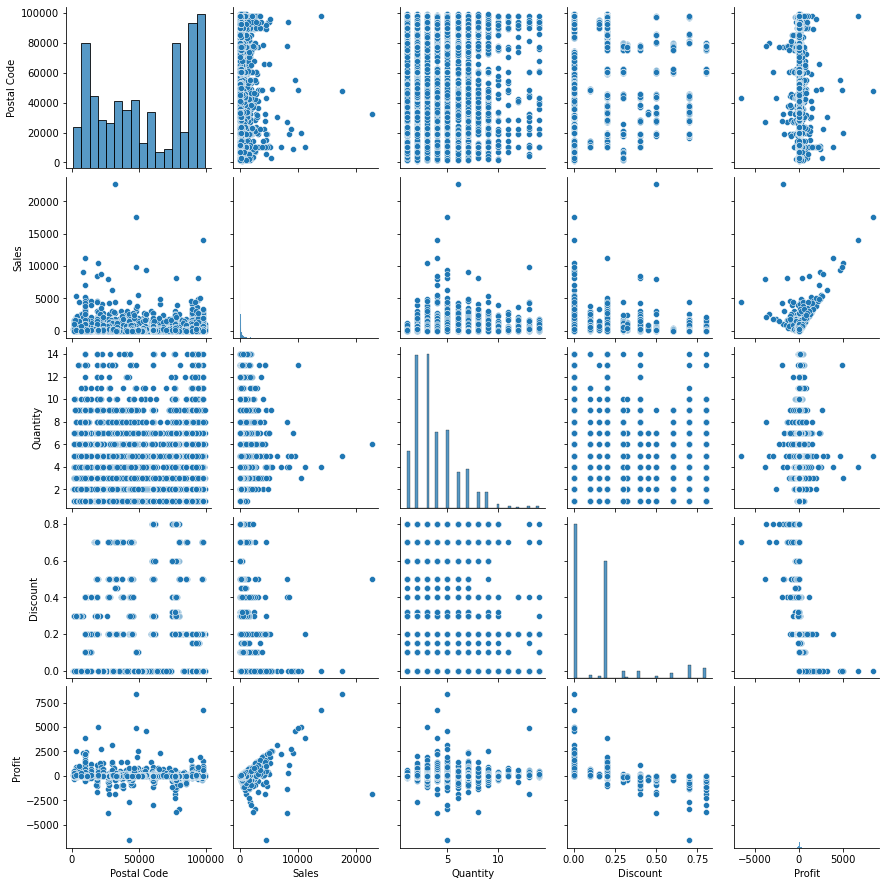

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


# Heatmap for view Correlation

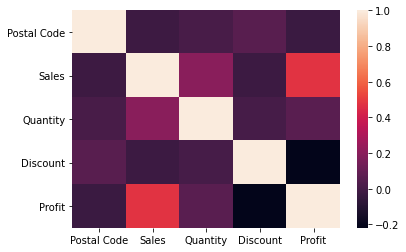

In [11]:
sns.heatmap(df.corr())
plt.show()

From the above heatmap:
- Sales and Profit are Moderately Correlated
- Discount and Profit are Negatively Correlated
- Quality and Profit are less Moderately Correlated


In [12]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

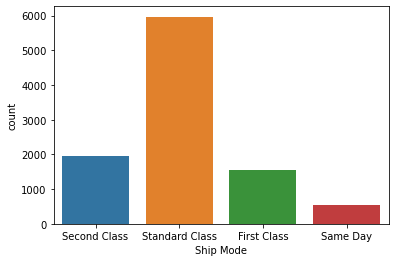

In [13]:
sns.countplot(x=df['Ship Mode'])

In [14]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

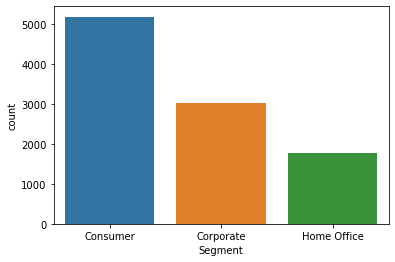

In [15]:
sns.countplot(x=df['Segment'])

In [16]:
df_segment = df.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount and Profit')

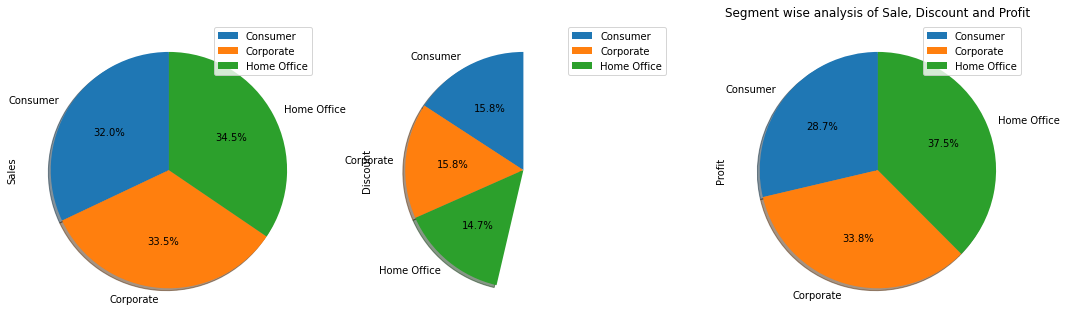

In [17]:
df_segment.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(18,20),startangle=90,shadow=True,label=df_segment.index)
plt.title('Segment wise analysis of Sale, Discount and Profit')

In [18]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [19]:
df1=df['State'].value_counts()

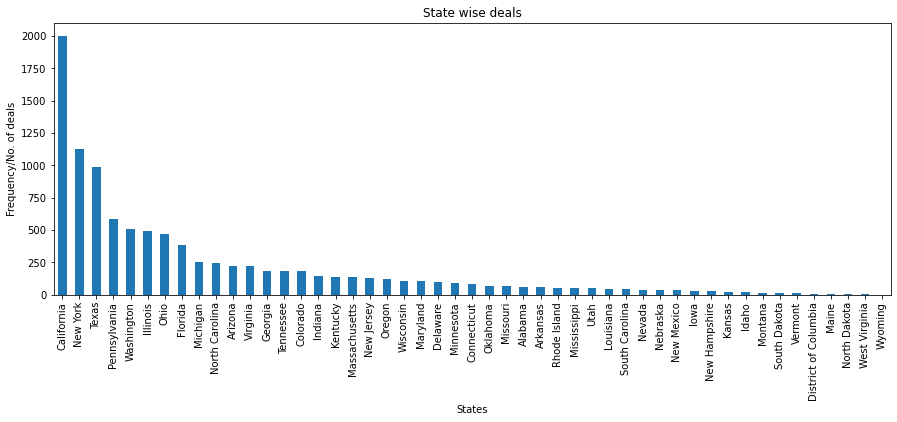

In [20]:
df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency/No. of deals')
plt.xlabel('States')
plt.title('State wise deals')
plt.show()

From the above graph
- The top states where deals are high
- California, New York, Texas, Pennsylvania and Washington

# City wise deals

In [21]:
df2=df['City'].value_counts()
df2=df2.head(50)

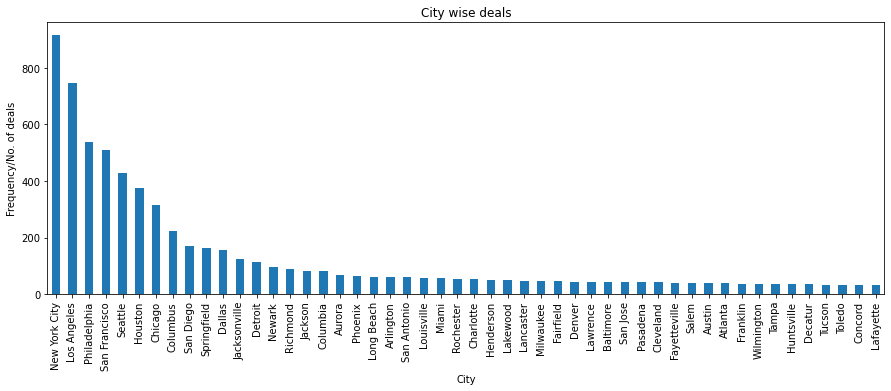

In [22]:
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency/No. of deals')
plt.xlabel('City')
plt.title('City wise deals')
plt.show()

From the above graph
- The top cities wherer deals are highest
- New York City, Los Angeles and Philadelphia

# State wise Analysis of Profit, Discount and sales

In [23]:
df['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [24]:
df_state=df.groupby(['State'])[['Sales','Discount','Profit']].mean()

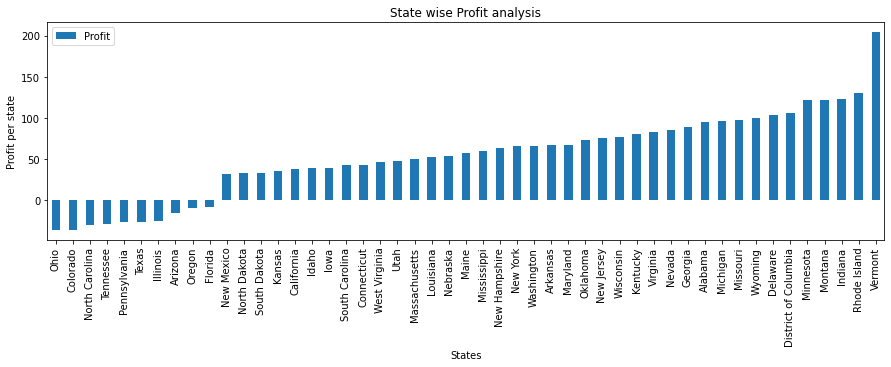

In [25]:
df_state1=df_state.sort_values('Profit')
df_state1[['Profit']].plot(kind='bar',figsize=(15,4))
plt.title('State wise Profit analysis')
plt.ylabel('Profit per state')
plt.xlabel('States')
plt.show()

From the above graph
- Highest Profit : Vermont
- Lowest Profit : Ohio

# State wise Discount Analysis

Text(0.5, 1.0, 'State wise Analysis of Discount')

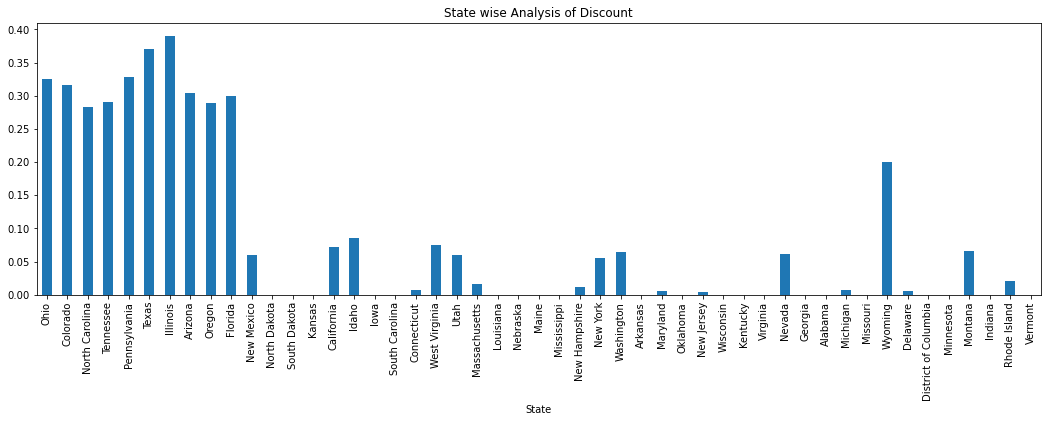

In [26]:
df_state1['Discount'].plot(kind='bar',figsize=(18,5))
plt.title('State wise Analysis of Discount')

# Distribution Plots of Sales, Profit, Discount and Quantity

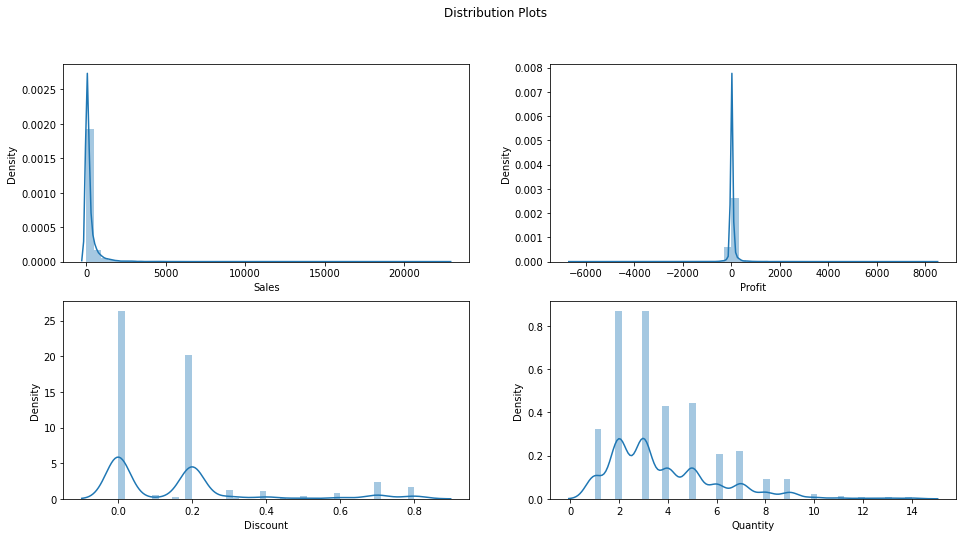

In [27]:
fig, axes=plt.subplots(2,2, figsize=(16,8))
fig.suptitle('Distribution Plots')
sns.distplot(df['Sales'],ax=axes[0,0])
sns.distplot(df['Profit'],ax=axes[0,1])
sns.distplot(df['Discount'],ax=axes[1,0])
sns.distplot(df['Quantity'],ax=axes[1,1])
plt.show()

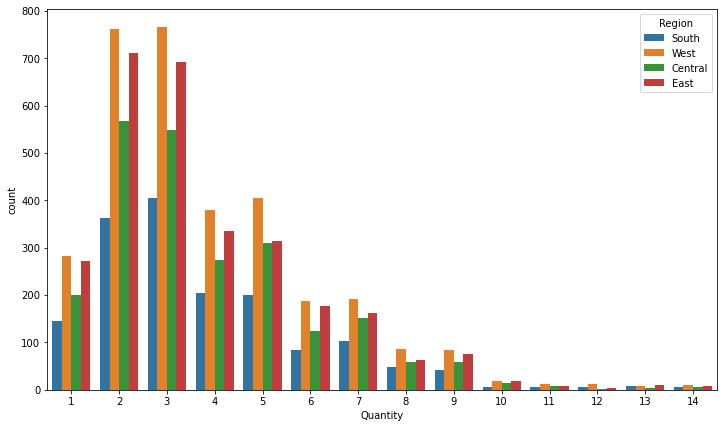

In [28]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
sns.countplot(df['Quantity'],hue=df['Region'])
plt.show()

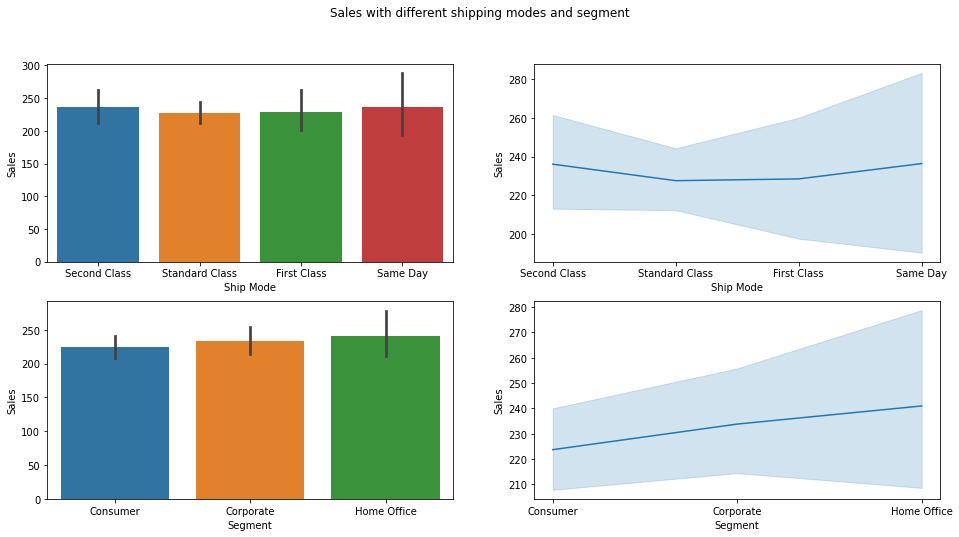

In [29]:
fig,axes=plt.subplots(2,2,figsize=(16,8))
fig.suptitle('Sales with different shipping modes and segment')
sns.barplot(df['Ship Mode'],df['Sales'],ax=axes[0,0])
sns.lineplot(df['Ship Mode'],df['Sales'],ax=axes[0,1])
sns.barplot(df['Segment'],df['Sales'],ax=axes[1,0])
sns.lineplot(df['Segment'],df['Sales'],ax=axes[1,1])
plt.show()

# Some Important Points

- Profit and Discount are highly correlated
- Over less quantity of products also the sales are high
- The Home Office provides highest sales followed by Corporate by a slight variation
- Highest Profit State: Vermont
- Lowest Profit State: Ohio
- Top cities where deals are high: New York City, Los Angeles, Philadelphia
- Top States where deals are high: California, New York, Texas, Pennsylvania and Washington
- Lowest Number of deals : Wyoming